## Reading/Writing an image file
OpenCV provides the imread() and imwrite() functions that support various file
formats for still images. The supported formats vary by system but should always
include the BMP format. Typically, PNG, JPEG, and TIFF should be among the
supported formats too. Images can be loaded from one file format and saved to
another. For example, let's convert an image from PNG to JPEG:



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [83]:
numpy_version = np.__version__
opencv_version = cv2.__version__
print("NUmpy version:{numpy}".format(numpy = numpy_version))
print("OpenCv version:{opencv}".format(opencv = opencv_version))



NUmpy version:1.16.2
OpenCv version:4.2.0


In [2]:
image = cv2.imread('images/dog5.jpg')
cv2.imwrite('writeImage/dog-copy.png',image)

True

By default, imread() returns an image in BGR color format, even if the file uses a
grayscale format. BGR (blue-green-red) represents the same color space as RGB
(red-green-blue) but the byte order is reversed.

## Load Image in different Color:
Optionally, we may specify the mode of imread() to be CV_LOAD_IMAGE_COLOR
(BGR), CV_LOAD_IMAGE_GRAYSCALE (grayscale), or CV_LOAD_IMAGE_UNCHANGED
(either BGR or grayscale, depending on the file's color space). For example, let's load
a PNG as a grayscale image (losing any color information in the process) and, then,
save it as a grayscale PNG image:

In [52]:
## Lets Create Simple function to Show Images
def displayImage(imageList):
    plt.figure(figsize=(30,20))
    i = 0
    for item in imageList:  
        plt.subplot(1, 5, i+1)
        plt.imshow(item['image'])
        i += 1
        plt.axis('off')
        plt.title(item['name'])
    plt.show()


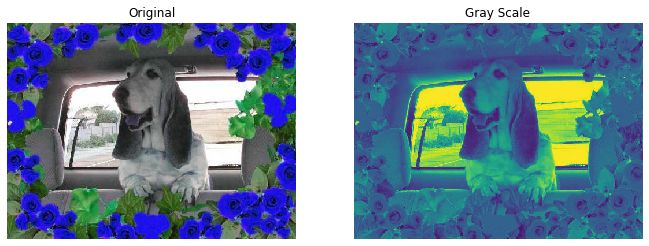

In [55]:
image = cv2.imread('images/dog5.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageList = [
    {'name':'Original','image':image},
    {'name':'Gray Scale','image':gray},
    
]
displayImage(imageList)

# Converting between an image and raw bytes
Conceptually, a byte is an integer ranging from 0 to 255. Throughout real-time
graphics applications today, a pixel is typically represented by one byte per
channel, though other representations are also possible

An OpenCV image is a 2D or 3D array of type numpy.array. An 8-bit grayscale
image is a 2D array containing byte values. A 24-bit BGR image is a 3D array, also
containing byte values. We may access these values by using an expression like
image[0, 0] or image[0, 0, 0]. The first index is the pixel's y coordinate, or row,
0 being the top. The second index is the pixel's x coordinate, or column, 0 being the
leftmost. The third index (if applicable) represents a color channel
Example:
As a more complete example, let's convert bytearray containing random bytes to a
grayscale image and a BGR image:


In [56]:
import numpy
import os

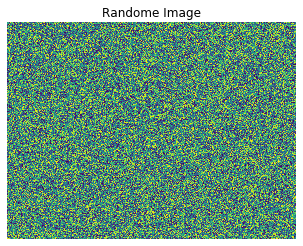

In [73]:
# Make an array of 120,000 random bytes.
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = numpy.array(randomByteArray)
# Convert the array to make a 400x300 grayscale image.
grayImage = flatNumpyArray.reshape(300,400)

imageList = [
    {'name':'Randome Image','image':grayImage},
    
]
displayImage(imageList)

## Reading/Writing a video file:
OpenCV provides the VideoCapture and VideoWriter classes that support various
video file formats. The supported formats vary by system but should always include
AVI. Via its read() method, a VideoCapture class may be polled for new frames until
reaching the end of its video file. Each frame is an image in BGR format. Conversely,
an image may be passed to the write() method of the VideoWriter class, which
appends the image to the file in VideoWriter. Let's look at an example that reads
frames from one AVI file and writes them to another AVI file with YUV encoding

In [79]:
cameraCapture = cv2.VideoCapture(0)
fps = 30 # an assumption

size = (int(cameraCapture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cameraCapture.get(cv2.CAP_PROP_FRAME_WIDTH)))
videoWriter = cv2.VideoWriter(
 'MyOutputVid.avi', cv2.cvCV_FOURCC('I','4','2','0'), fps, size)
success, frame = cameraCapture.read()
numFramesRemaining = 10 * fps - 1
while success and numFramesRemaining > 0:
 videoWriter.write(frame)
 success, frame = cameraCapture.read()
 numFramesRemaining -= 1